In [1]:
%matplotlib inline
import numpy as np
import random as random
import matplotlib.pyplot as plt
import math

import warnings
warnings.simplefilter('ignore', np.RankWarning)

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [2]:
# Set seed
random.seed(1075)

In [10]:
# Create random curve
length = 125
X      = np.linspace(0, 10, length)

In [12]:
# This is our known function
y = 0.5 * np.cos(X)

y_scatter = []

In [13]:
# Create random scattering around the true function
for i, j in enumerate(y):
    y_scatter.append( y[i] + random.uniform(-.3, .3))
    

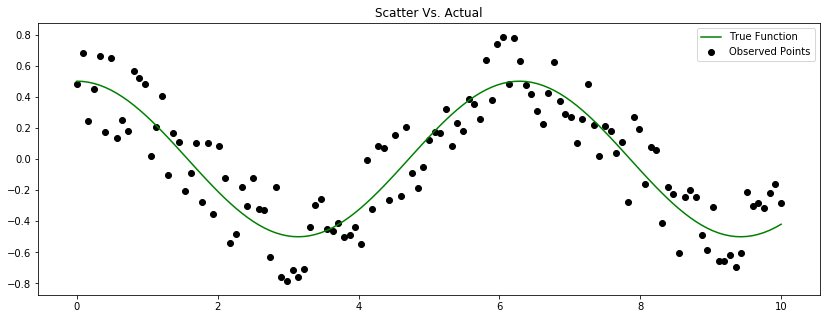

In [15]:
plt.figure(figsize=(14, 5))    
plt.plot(X, 
         y, 
         color='g')

plt.scatter(X, 
            y_scatter, 
            color='k')

plt.title("Scatter Vs. Actual")
plt.legend(['True Function', 'Observed Points']);

#### So what does overfitting look like? 
#### We want to see if we can estimate a function for y = 0.5 * np.cos(x) using a linear model. 

#### We know it is going to have a polynomial degree of some number, but we don’t know what is correct degree.

In [16]:
# Define a RMSE function
def get_rmse(y, y_pred):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [17]:
# Create dataframe to collect the RMSE, and plot later
rmse_df = pd.DataFrame(columns=["degree", "rmse_train", "rmse_test"])

In [18]:
# Split up your data
train_X, test_X, train_y, test_y = train_test_split(x, 
                                                    y_scatter,
                                                    test_size=0.33, 
                                                    random_state=1075)


#### numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)[source]
Least squares polynomial fit.

Fit a polynomial 

$ p(x) = p[0] * x^{deg} + ... + p[deg] $

of degree __deg__ to points (x, y). 

Returns a __vector of coefficients__ p that minimises the squared error.

__Parameters:__
- x : array_like, shape (M,) x-coordinates of the M sample points (x[i], y[i]).

- y : array_like, shape (M,) or (M, K) y-coordinates of the sample points. Several data sets of sample points sharing the same x-coordinates can be fitted at once by passing in a 2D-array that contains one dataset per column.

deg : int - Degree of the fitting polynomial

__Returns:__
- p : ndarray, shape (deg + 1,) or (deg + 1, K)
Polynomial coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k].

- residuals, rank, singular_values, rcond
Present only if full = True. Residuals of the least-squares fit, the effective rank of the scaled Vandermonde coefficient matrix, its singular values, and the specified value of rcond. For more details, see linalg.lstsq.

- V : ndarray, shape (M,M) or (M,M,K)
Present only if full = False and cov`=True. The covariance matrix of the polynomial coefficient estimates. The diagonal of this matrix are the variance estimates for each coefficient. If y is a 2-D array, then the covariance matrix for the `k-th data set are in V[:,:,k]

#### numpy.polyval
numpy.polyval(p, x)[source]
Evaluate a polynomial at specific values.

If p is of length N, this function returns the value:

p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]
If x is a sequence, then p(x) is returned for each element of x. If x is another polynomial then the composite polynomial p(x(t)) is returned.

__Parameters:__	
- p : array_like or poly1d object
1D array of polynomial coefficients (including coefficients equal to zero) from highest degree to the constant term, or an instance of poly1d.

x : array_like or poly1d object
A number, an array of numbers, or an instance of poly1d, at which to evaluate p.

__Returns:__	
values : ndarray or poly1d
If x is a poly1d instance, the result is the composition of the two polynomials, i.e., x is “substituted” in p and the simplified result is returned. In addition, the type of x - array_like or poly1d - governs the type of the output: x array_like => values array_like, x a poly1d object => values is also.

In [78]:
np.polyval([3, 0, 1], 5)  # 3 * 5**2 + 0 * 5**1 + 1

76

In [19]:
# Get the rmse for each prediction (both training and testing)
for i in range(1, 20):
    
    p = np.polyfit(train_X, train_y, deg=i)
    
    rmse_df.loc[i-1] = [i,
                        get_rmse(train_y, np.polyval(p, train_X)),
                        get_rmse(test_y,  np.polyval(p, test_X))
                       ]

In [102]:
# understand the above
poly_fit = np.polyfit(train_X, train_y, deg=3)
y_pred   = np.polyval(p, train_X)
y_pred

array([-0.53730432,  0.48923609,  0.28673085, -0.52054468,  0.13145551,
        0.21036631,  0.35864095,  0.47169948, -0.01419295,  0.21097369,
        0.34684244, -0.71721271,  0.24249691, -0.4846113 , -0.48696916,
        0.5004273 ,  0.01319206, -0.56368598, -0.66272974,  0.43727782,
       -0.44460359,  0.39479736, -0.42190901,  0.03675481, -0.23786483,
       -0.30033282,  0.50800344, -0.68984856, -0.4172131 , -0.63709581,
       -0.55282676, -0.36800348,  0.42194051, -0.20837837,  0.17323699,
        0.49578156,  0.32491515,  0.44182529, -0.67122132,  0.03484017,
       -0.33569986, -0.1194346 , -0.59513053,  0.0909566 ,  0.0856639 ,
        0.47101975,  0.06794165,  0.49009658,  0.21288954,  0.48424926,
        0.49208791, -0.02569419, -0.68112167, -0.37382227, -0.17656288,
        0.34817331,  0.167041  , -0.07523759, -0.46530804,  0.38145107,
       -0.11024521, -0.46679732,  0.53092248,  0.36446019, -0.55360869,
       -0.11743793, -0.54057924, -0.57694576, -0.57789616,  0.53

In [103]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.428860,0.371423
1,2.0,0.428248,0.367248
2,3.0,0.266337,0.303314
3,4.0,0.251911,0.286420
4,5.0,0.180017,0.183997
5,6.0,0.178008,0.183643
6,7.0,0.175561,0.179824
7,8.0,0.175521,0.178273
8,9.0,0.175023,0.180948
9,10.0,0.170833,0.182602


Text(0.5, 1.0, 'Train Vs. Test Error')

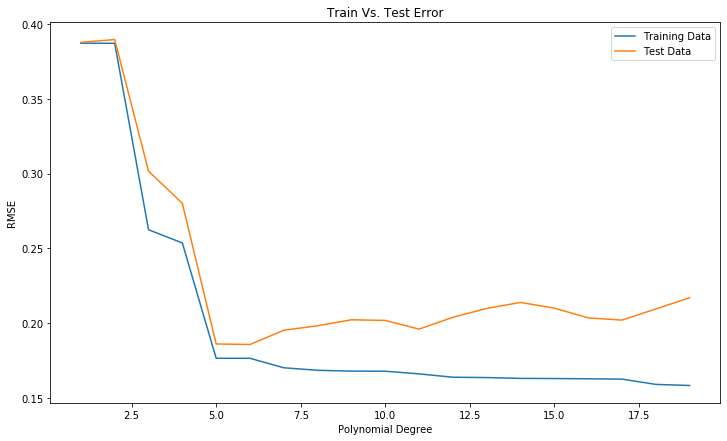

In [20]:
# Plot
plt.figure(figsize=(12, 7))
plt.plot(rmse_df.degree, rmse_df.rmse_train, label='Training Data')
plt.plot(rmse_df.degree, rmse_df.rmse_test,  label='Test Data')

plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')

plt.legend()
plt.title('Train Vs. Test Error')

#### at degree = 5 on the graph, the test error does not increase as complexity increases
If you were working with larger dataset, you would expect an uptick of test data errors as the polynomial degree increases.

#### numpy.vander

In [90]:
# Vander example
arr = np.array([1, 2, 3, 5])
N = 6
np.vander(arr, N)

array([[   1,    1,    1,    1,    1,    1],
       [  32,   16,    8,    4,    2,    1],
       [ 243,   81,   27,    9,    3,    1],
       [3125,  625,  125,   25,    5,    1]])

In [89]:
train_X


array([ 3.30645161,  6.4516129 ,  0.88709677,  3.38709677,  4.83870968,
        5.        ,  5.64516129,  6.29032258,  4.59677419,  7.25806452,
        7.01612903, 10.        ,  5.08064516,  3.5483871 ,  8.62903226,
        0.16129032,  7.74193548,  2.74193548,  9.35483871,  0.72580645,
        3.70967742,  5.88709677,  3.79032258,  4.67741935,  2.17741935,
        2.25806452,  0.32258065,  9.03225806,  2.41935484,  9.51612903,
        3.22580645,  3.9516129 ,  6.85483871,  8.30645161,  4.91935484,
        0.64516129,  5.40322581,  6.12903226,  9.27419355,  7.66129032,
        4.03225806,  2.01612903,  9.59677419,  7.5       ,  4.75806452,
        6.69354839,  1.20967742,  6.53225806,  0.96774194,  6.61290323,
        0.24193548,  7.90322581,  9.19354839,  9.75806452,  2.09677419,
        5.56451613,  7.33870968,  8.06451613,  3.62903226,  5.80645161,
        8.14516129,  2.5       ,  0.40322581,  0.80645161,  8.70967742,
        4.43548387,  2.66129032,  3.06451613,  2.82258065,  0.  

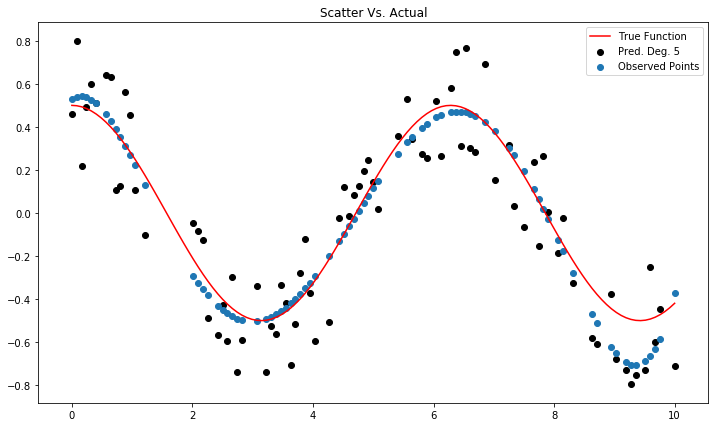

In [113]:
# Create a linear model with  polynomial degree 5
lm_model_5 = LinearRegression()

# vander converts 1 column train_x to degree of poly = N - 1
lm_model_5.fit(np.vander(train_X, 6), train_y)

# degree of poly should be 5 here
degree_5 = lm_model_5.coef_.size - 1

y_pred_5 = lm_model_5.predict(np.vander(train_X, degree_5 + 1))

# Plot side by side
plt.figure(figsize=(12, 7))   

# scatter of training data
plt.scatter(train_X, train_y, color = 'k')

# original plot
plt.plot(x, 
         y, 
         color='r')

plt.scatter(train_X, y_pred_5)

plt.title("Scatter Vs. Actual")
plt.legend(['True Function', 'Pred. Deg. 5', 'Observed Points'])

In [ ]:
# So how does this relate to ridge models?

# As the model complexity increases — increasing the polynomial degree — the models tends to 
# fit even smaller deviations in the training data set and will lead to overfitting. 

# You can see that in the training vs test error graph, where the error rate does not really 
# move after degree = 5

In [21]:
# Create a function for a curve
def curve(x_val):
    return (x_val ** 2) + 3.0

In [22]:
# Create the values
x = np.linspace(0, 10, length)
y_scatter_curve = curve(x)

noise = 20 * (np.random.random(125) - 4.0)

y_scatter_curve       = y_scatter_curve + noise
y_scatter_curve_noise = y_scatter_curve.copy()

In [23]:
# Add "bumps" at the start and end of the series
for i, j in enumerate(y_scatter_curve_noise):
    if i < 25:
        y_scatter_curve_noise[i] = j + (5 * (np.random.random() + 5.0))
    if i > 100:
        y_scatter_curve_noise[i] = j + (5 * (np.random.random() - 5.0))

Text(0.5, 1.0, 'Scatter With More Noise')

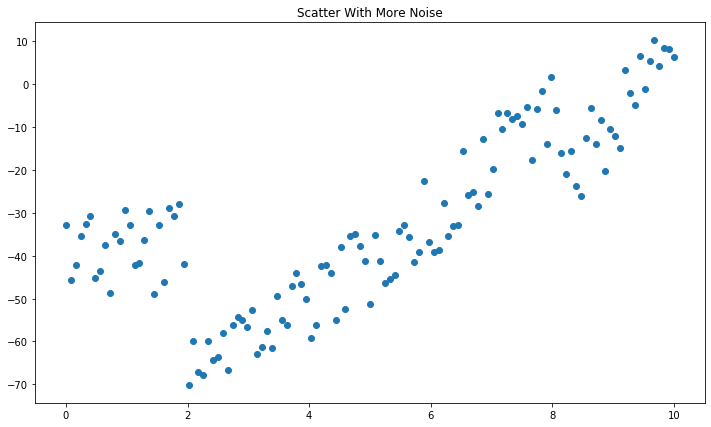

In [24]:
# Plot
plt.figure(figsize=(12, 7))    
plt.scatter(x, y_scatter_curve_noise)
plt.title("Scatter With More Noise")

In [25]:
# Let's try RidgeCV to search for the correct alpha

alphas = np.linspace(.00001, 2, 500)

# Get the best version of alpha
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(np.vander(x, 6), y_scatter_curve_noise)

print (ridgecv.alpha_)

1e-05


In [26]:
# Get the MSE
lm_ridge = Ridge(alpha = ridgecv.alpha_)
lm_ridge.fit(np.vander(x, 6), y_scatter_curve_noise)
mean_squared_error(y_scatter_curve_noise, lm_ridge.predict(np.vander(x, 6)))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09226e-16): result may not be accurate.
  overwrite_a=True).T


62.37829302613875

In [27]:
# we should also compare this to a linear model to see if there are any substantial 
# improvements to using a ridge regression.

In [28]:
# Fit a linear model
final_lm_model = LinearRegression()
final_lm_model.fit(np.vander(x, 6), y_scatter_curve_noise)
final_lm_degree = final_lm_model.coef_.size - 1
final_lm_y_pred = final_lm_model.predict(np.vander(x, final_lm_degree + 1))

# Print the MSE
mean_squared_error(y_scatter_curve_noise, final_lm_y_pred)

62.37829302531324